* Sağlık hizmetlerinde yapay zeka, karmaşık tıbbi ve sağlık hizmeti verilerinin analizi, yorumlanması ve anlaşılmasında insan bilişini taklit etmek için karmaşık algoritmaların ve yazılımların veya başka bir deyişle yapay zekanın kullanılmasıdır.
* Yapay zeka teknolojisini sağlık hizmetlerinde geleneksel teknolojilerden ayıran şey, bilgi edinme, işleme ve son kullanıcıya iyi tanımlanmış bir çıktı verme yeteneğidir.
* Yapay zeka, bunu makine öğrenimi algoritmaları ve derin öğrenme yoluyla yapar. Bu algoritmalar davranış kalıplarını tanıyabilir ve kendi mantığını oluşturabilir.
* Yapay zekanın önemi sağlık alanında her geçen gün artmaktadır.

## Veri Setini Tanıma

* Göğüs kaneri verrilerini içeren bir veri seti kullanarak, iyi huylu ve kötü huylu kanser hücrelerini sınıflandırma problemi çözeceğim.
* Veri setinde bulunan özellikler, bir göğüs kitlesinin ince iğne aspiratının dijitalleştirilmiş bir görüntüsünden hesaplanır.
* Veri seti içerisinde bulunan özellikler:
    * ID number: Örneğin numarası
    * Diagnosis(M = malignant(kötü huylu), B = benign(iyi huylu))
    * radius: yarıçap
    * texture: doku
    * perimeter: çevre
    * area: alan
    * smoothness: pürüzsüzlük
    * compactness: kompaktlık
    * concavity: içbükeylik
    * concave points: içbükey noktalar
    * symmetry: simetri
    * fractal dimension: fraktal boyut

## Veri Seti Yükleme

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
veri = pd.read_csv("data.csv")

In [4]:
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
veri.drop(["id", "Unnamed: 32"], axis = 1, inplace = True)

In [6]:
veri.rename(columns={"diagnosis" : "hedef"}, inplace=True)

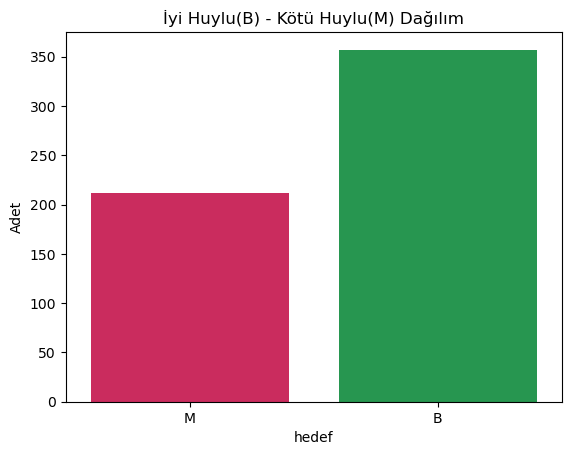

B    357
M    212
Name: hedef, dtype: int64


In [10]:
plt.figure()
sns.countplot(x = veri["hedef"], palette = ["#e41255", "#15a84b"])
plt.ylabel("Adet")
plt.title("İyi Huylu(B) - Kötü Huylu(M) Dağılım")
plt.show()
print(veri["hedef"].value_counts())

In [11]:
# M -> 1, B -> 0
veri["hedef"] = [1 if i.strip() == "M" else 0 for i in veri["hedef"]]

In [12]:
veri.head(3)

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [13]:
veri.shape

(569, 31)

In [14]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hedef                    569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* Bu analizde, veriyi standaardize edilmesi gerektiğini anlıyorum.

## Keşifsel Veri Analizi

<Figure size 1200x800 with 0 Axes>

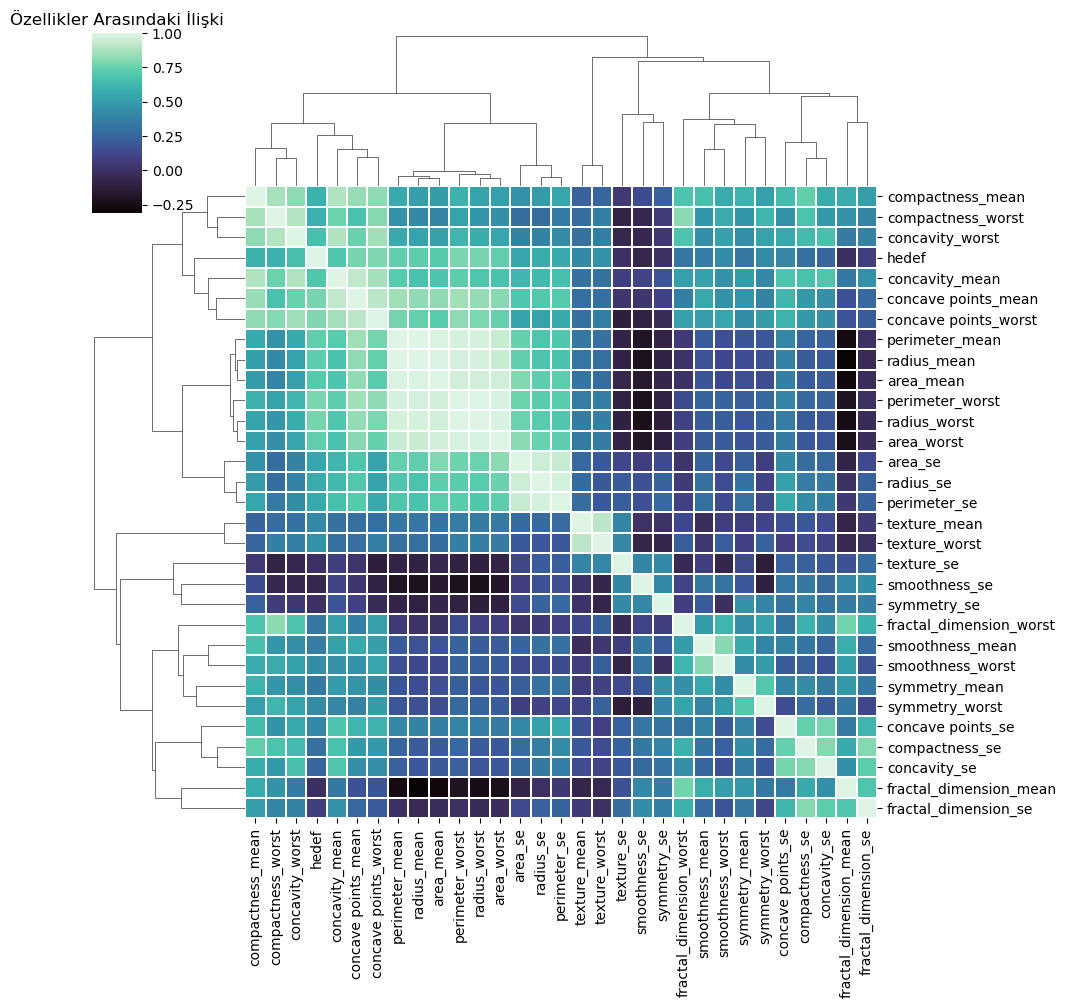

In [28]:
corr_matrix = veri.corr()
plt.figure(figsize=(12,8))
sns.clustermap(corr_matrix, linewidths = 0.1, cmap = "mako")
plt.title("Özellikler Arasındaki İlişki")
plt.show()

<Figure size 640x480 with 0 Axes>

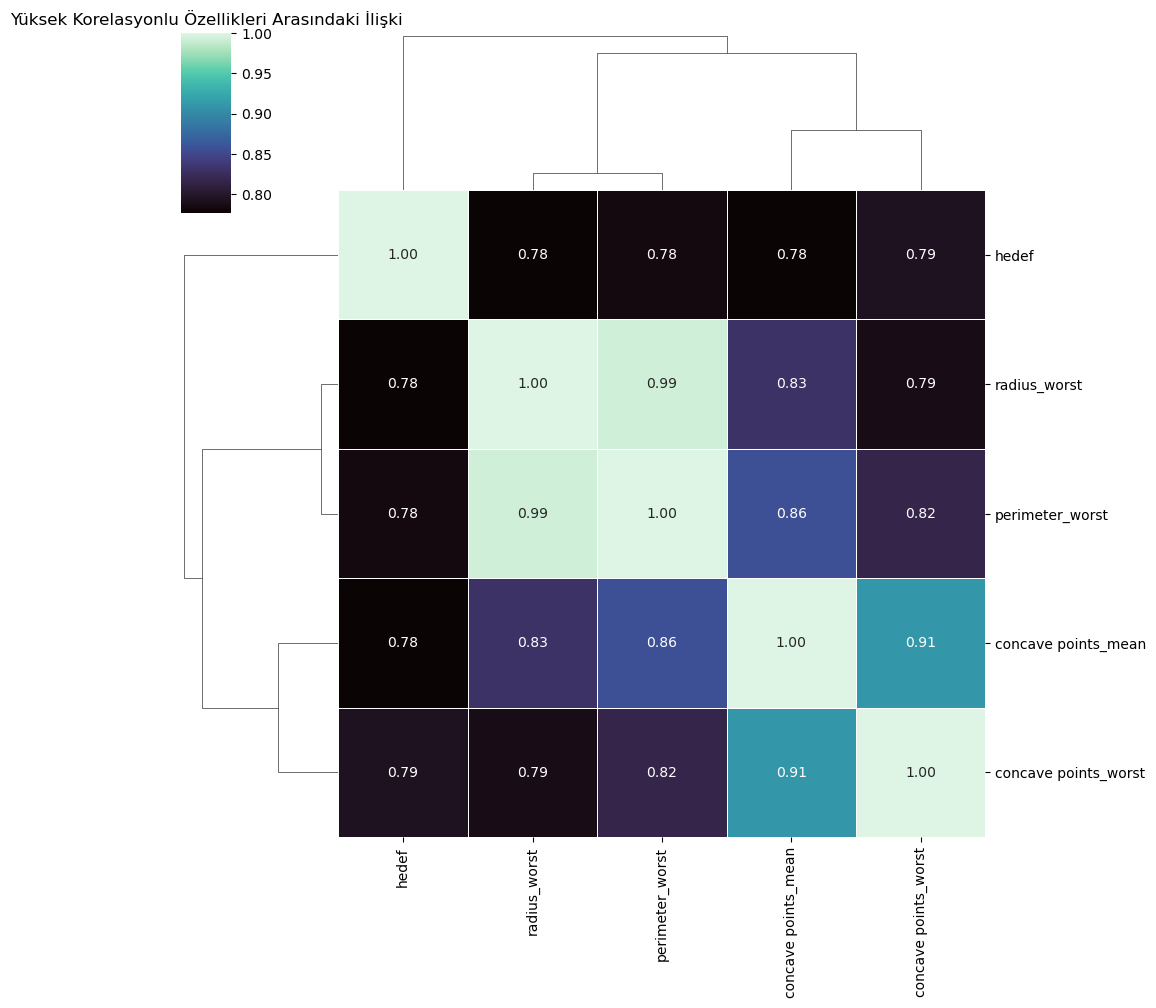

In [34]:
# hedef ile arasındaki ilişki 0.75'ten büyük olan özelliklere bakalım
esik_degeri = 0.75
filtre = corr_matrix["hedef"] > esik_degeri
corr = corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr].corr(), annot = True, fmt = ".2f", linewidths = 0.5, cmap = "mako")
plt.title("Yüksek Korelasyonlu Özellikleri Arasındaki İlişki")
plt.show()

* Burada kander hücresinin sınıfını belirlemede concave points_mean, concave points_worst, perimeter_worst, radius_worst özelliklerinin etkili olduğu anlaşılıyor.

<Figure size 640x480 with 0 Axes>

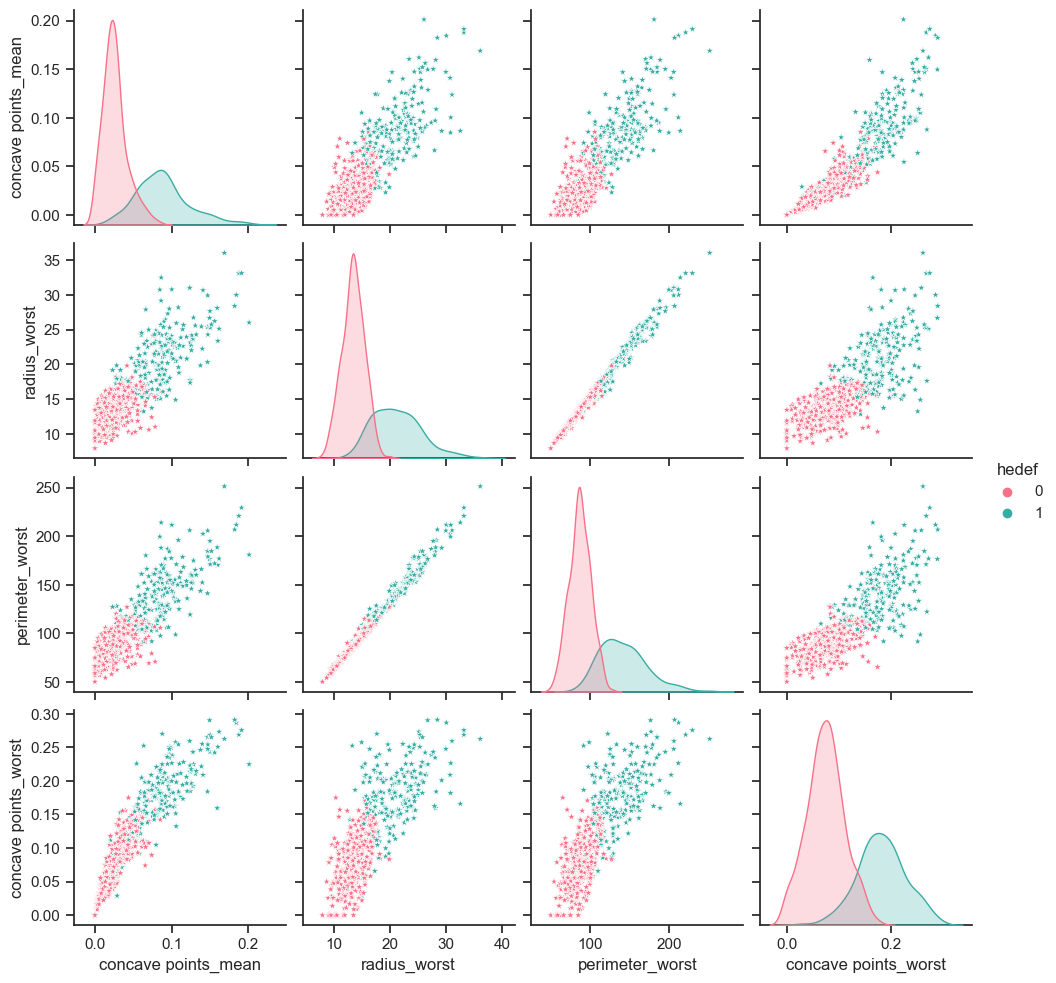

In [43]:
# hedef ile ilişkili özelliklerin saçılımı
plt.figure()
sns.pairplot(veri[corr], diag_kind="kde", markers = "*", hue = "hedef", palette="husl")
plt.show()

## Aykırı Dğer Tespiti

In [44]:
y = veri["hedef"]
x = veri.drop(["hedef"], axis = 1)
columns = x.columns.tolist()

In [45]:
# yerel aykırı faktör yöntemi
clf = LocalOutlierFactor()

y_pred = clf.fit_predict(x)

# skora bakalım
X_score = clf.negative_outlier_factor_

In [47]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [51]:
# belirli bir eşik değerine göre aykırı değerleri bulalım
esik = -2.2
filtre = outlier_score["score"] < esik
outlier_index = outlier_score[filtre].index.tolist()

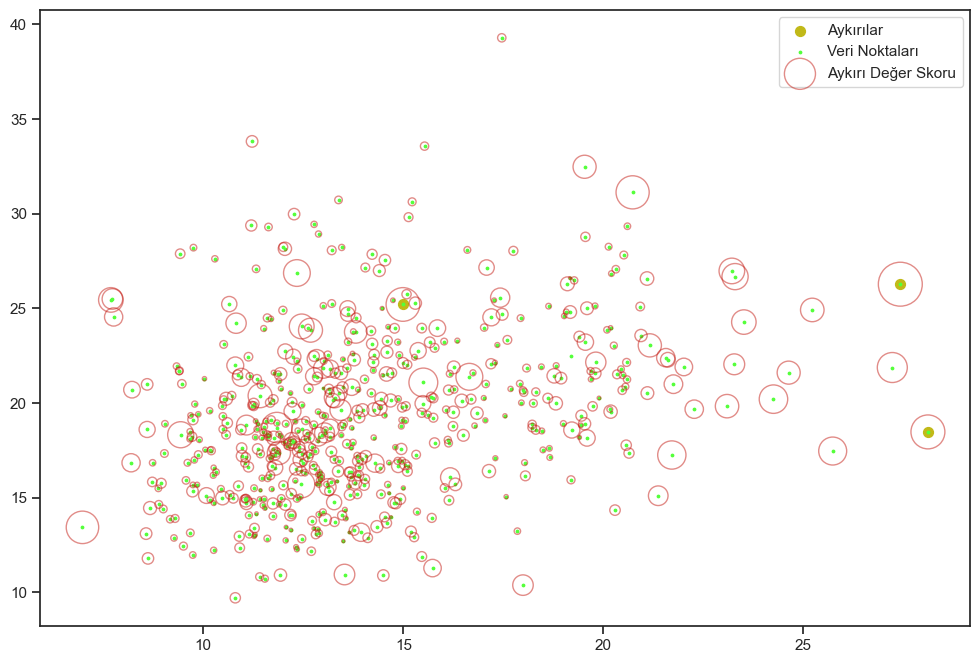

In [54]:
# yerel aykırı faktör yöntemi ile belirlenen aykırı değerleri çıkaralım
plt.figure(figsize=(12,8))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = "#c1b918", s = 50, label = "Aykırılar")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "#54ff3b", s = 3, label = "Veri Noktaları")

radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], edgecolors = "#c41a12", s = 1000 * radius, label = "Aykırı Değer Skoru",
            alpha = 0.5, facecolors = "none")

plt.legend()
plt.show()

In [55]:
# aykırı değerleri çıkaralım
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## Eğitim - Test Bölünmesi

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Standardizasyon

* Standardizasyon işlemi, veriyi sıfır ortalamalı, 1 standart sapmalı hale getirme işlemidir.

In [57]:
# Standardizasyon
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
# görselleştirmede kullanmak için veri çerçevesi oluşturuyorum
X_train_df = pd.DataFrame(X_train, columns=columns)
X_train_df_describe = X_train_df.describe()
X_train_df["hedef"] = y_train

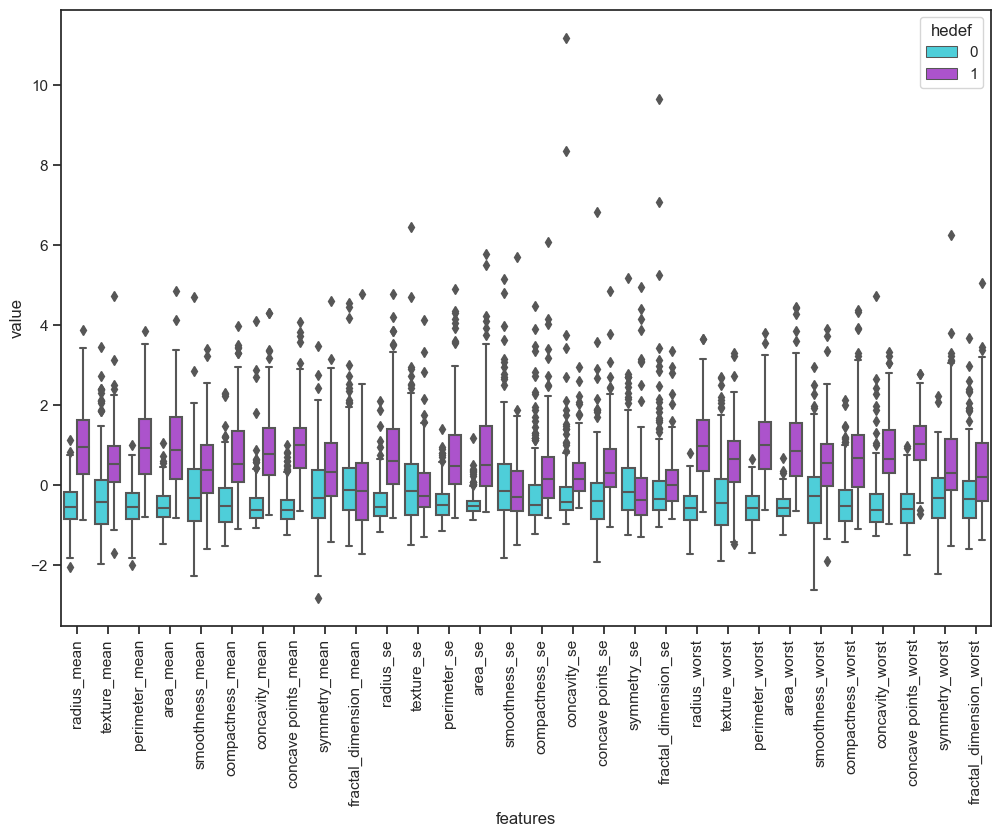

In [61]:
data_melted = pd.melt(X_train_df, id_vars="hedef", var_name="features", value_name="value")
# pd.melt fonksiyonu, X_train_df veri çerçevesini dönüştürmek için kullanılıyor. 
# id_vars parametresi "hedef" olarak ayarlanarak "hedef" sütunu korunurken, 
# diğer sütunlar birleştirilerek yeni sütunlar oluşturulur. 
# Bu dönüşüm sonucunda, "features" adında bir sütun, orijinal sütun isimlerini ve "value" adında bir sütun, 
# bu orijinal sütunların değerlerini içeren bir veri çerçevesi olan data_melted elde edilir.

plt.figure(figsize=(12,8))
sns.boxplot(x = "features", y = "value", hue = "hedef", data = data_melted, palette=["#37e2f0", "#b53fe0"])
plt.xticks(rotation=90)
plt.show()

## K-En Yakın Komşu

In [68]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [69]:
tahmin = knn.predict(X_test)

Karışıklık Matrisi:  [[101   1]
 [  8  60]]


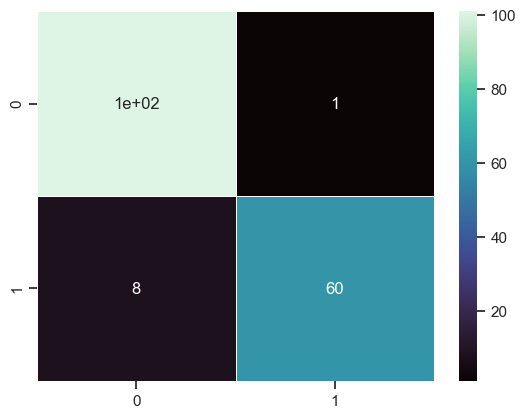

In [70]:
cm = confusion_matrix(y_test, tahmin)
print("Karışıklık Matrisi: ", cm)

plt.figure()
sns.heatmap(cm, annot=True, linewidths=0.5, cmap="mako")
plt.show()

In [71]:
# Doğruluk
accuracy_score(y_test, tahmin)

0.9470588235294117

## Temel Bileşenler Analizi

In [73]:
# standardizasyon
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [74]:
# 2 tane bileşenden oluşsun
pca = PCA(n_components=2)

In [75]:
pca.fit(x_scaled)

PCA(n_components=2)

In [76]:
X_reduced_pca = pca.transform(x_scaled)

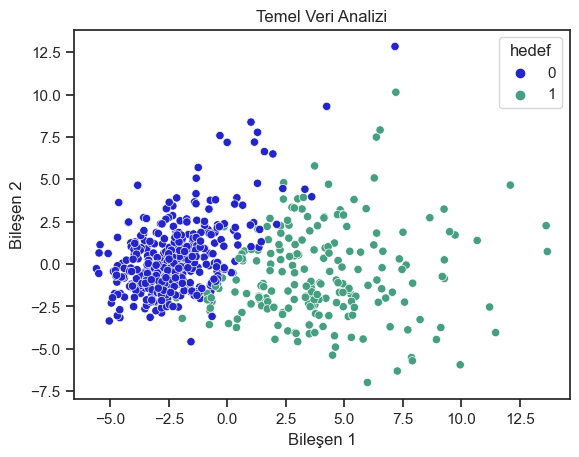

In [78]:
# pca'i yorumlamak için veri çerçevesine alalım
pca_data = pd.DataFrame(X_reduced_pca, columns=["p1", "p2"])
pca_data["hedef"] = y

plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = pca_data, palette=["#2325ca", "#469f81"])
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [79]:
# pca sonucu elde edilen verilerin eğitim ve test bölünmesi
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_pca, y, test_size=0.3, random_state=42)

In [80]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=7)

In [81]:
tahmin = knn.predict(X_test_pca)

In [83]:
accuracy_score(y_test_pca, tahmin)

0.9294117647058824

## Komşuluk Bileşenleri Analizi

* Komşuluk bileşenleri analizi, çok değişkenli verilerin veriler üzerinde belirli bir mesafe ölçüsüne göre farklı sınıflarda sınıflandırılması için denetimli bir öğrenme yöntemidir.

In [84]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [85]:
nca.fit(x_scaled, y)

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [86]:
X_reduced_nca = nca.transform(x_scaled)

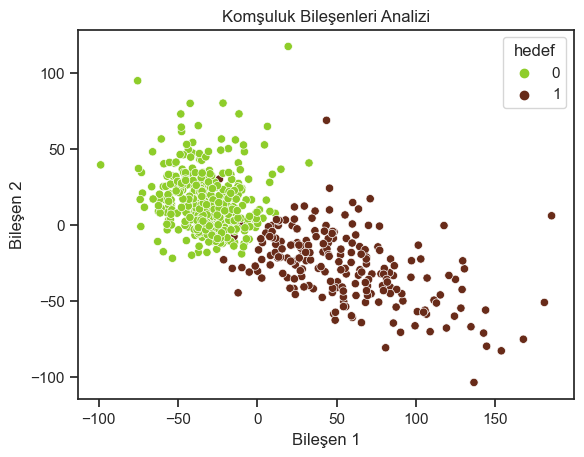

In [87]:
nca_data = pd.DataFrame(X_reduced_nca, columns=["p1", "p2"])
nca_data["hedef"] = y

plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = nca_data, palette=["#8ecd2a", "#682b19"])
plt.title("Komşuluk Bileşenleri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [88]:
X_train_nca, X_test_nca, y_train_nca, y_test_nca = train_test_split(X_reduced_nca, y, test_size=0.3, random_state=42)

In [89]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_nca, y_train_nca)

KNeighborsClassifier(n_neighbors=1)

In [90]:
tahmin = knn.predict(X_test_nca)

In [91]:
accuracy_score(y_test_nca, tahmin)

0.9764705882352941